In [1]:
import numpy as np
import sys
import os
from dask.distributed import Client

sys.path.append(os.path.abspath('../../data_processing'))
from process_urls_dask import get_file_urls, process_urls_in_parallel
from utils_dask import plot_polar_data

# Set up the Dask client
client = Client(n_workers=4, threads_per_worker=2, memory_limit='4GB')

In [2]:
LOLA_home = 'https://imbrium.mit.edu/DATA/LOLA_GDR/POLAR/JP2/'

LOLA_urls = get_file_urls(LOLA_home, '.LBL', 'LDRM')    # LDRM is Lunar Digital Reflectance Map (Albedo)
print(f"Found {len(LOLA_urls)} LOLA files")

LOLA_df = process_urls_in_parallel(client, LOLA_urls, 'LOLA').compute()
print("Files processed successfully")

Found 4 LOLA files


/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 110.51 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Files processed successfully


Number of NaNs in LOLA Albedo data: 134278 out of 5793824 (2.32%)

Number of lats between -85 and -90: 323280 (5.58%)
Number of LOLA vals with a lat less than -86: 0 (0.00%)
          Longitude      Latitude          LOLA
count  5.793824e+06  5.793824e+06  5.659546e+06
mean   1.800000e+02 -3.173524e-10  4.194845e-01
std    1.039230e+02  8.008338e+01  9.912680e-02
min    4.222238e-02 -9.000000e+01  4.000000e-03
25%    9.002111e+01 -7.939803e+01  3.530000e-01
50%    1.800000e+02  0.000000e+00  4.110000e-01
75%    2.699789e+02  7.939803e+01  4.750000e-01
max    3.599578e+02  9.000000e+01  1.000000e+00


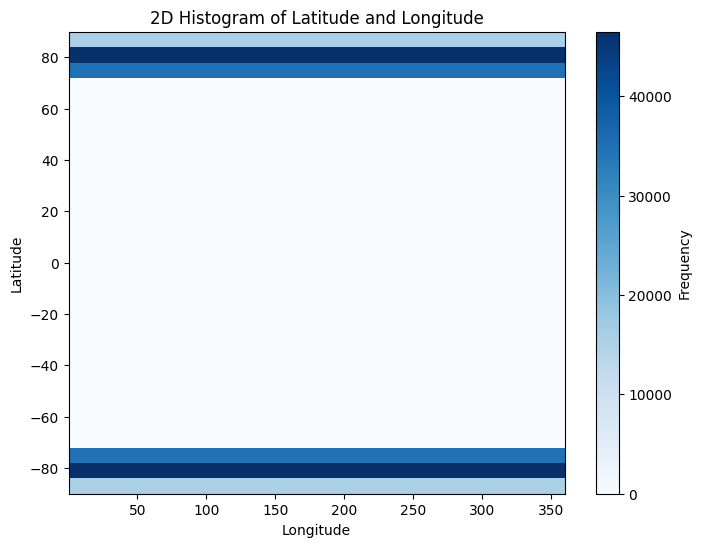

/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 107.96 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Latitude range: 75.00020599365234 to 90.0
Second latitude: 75.00020599365234
Latitude range: -90.0 to -75.00020599365234
Second latitude: -83.90095520019531
Plotting 2139027 data points...


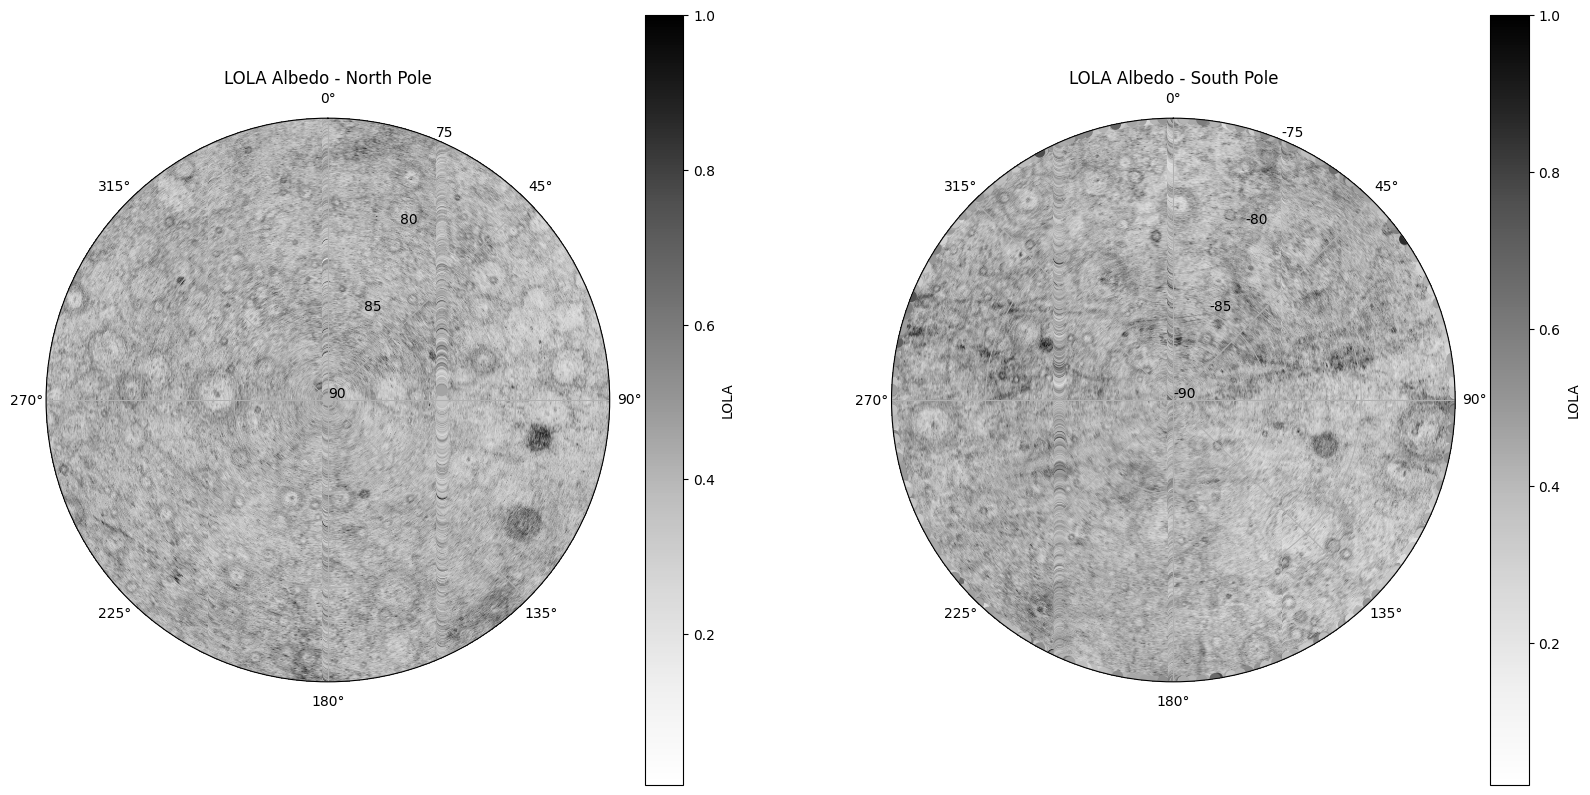

In [3]:
print(f"Number of NaNs in LOLA Albedo data: {np.isnan(LOLA_df["LOLA"]).sum()} out of {np.prod(LOLA_df["LOLA"].shape)} ({(np.isnan(LOLA_df["LOLA"]).sum()/np.prod(LOLA_df["LOLA"].shape)*100):.2f}%)\n")

print(f'Number of lats between -85 and -90: {(LOLA_df["Latitude"] <= -85).sum()} ({(LOLA_df["Latitude"] <= -85).sum()/len(LOLA_df)*100:.2f}%)')

print(f'Number of LOLA vals with a lat less than -86: {(LOLA_df["LOLA"][LOLA_df["Latitude"] <= -86] < 0).sum()} ({(LOLA_df["LOLA"][LOLA_df["Latitude"] <= -86] < 0).sum()/len(LOLA_df)*100:.2f}%)')

print(LOLA_df.describe())

import matplotlib.pyplot as plt

# 2D Histogram
plt.figure(figsize=(8, 6))

plt.hist2d(LOLA_df['Longitude'], LOLA_df['Latitude'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Histogram of Latitude and Longitude')
plt.show()

plot_polar_data(LOLA_df, 'LOLA', frac=0.5, title_prefix='LOLA Albedo')

client.close()